# importing libraries

In [1]:
import pyttsx3
engine = pyttsx3.init()
def speak(audio):
    engine.say(audio)
    engine.runAndWait()

In [2]:
speak('hello   .........,sir..., imorting libraries')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
speak('reading data')

In [7]:
data = pd.read_csv('HeartDisease.csv')


In [11]:
len(data.corr())

14

In [12]:
len(data.columns)

14

In [13]:
data.shape

(303, 14)

In [14]:
data.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [15]:
l = ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']
for i in l:
    data[i] = data[i].astype('object')

In [16]:
data.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

In [20]:
len(data.corr())

6

In [23]:
len(data.columns)

14

In [17]:
independent_variable = data.drop(['target'], axis = 1)
dependent_variabe = pd.DataFrame(data['target'])

In [18]:
speak('checking dependent variables')

# checking dependent variable

In [9]:
values = pd.DataFrame(data['target'].value_counts())
values['per'] = (data['target'].value_counts()/data['target'].value_counts().sum())
values
#it is almost balanced

,target,per
1,165,0.544554
0,138,0.455446


In [10]:
data.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

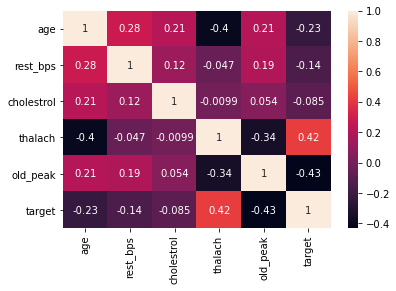

In [11]:
sns.heatmap(data.corr(), annot= True)

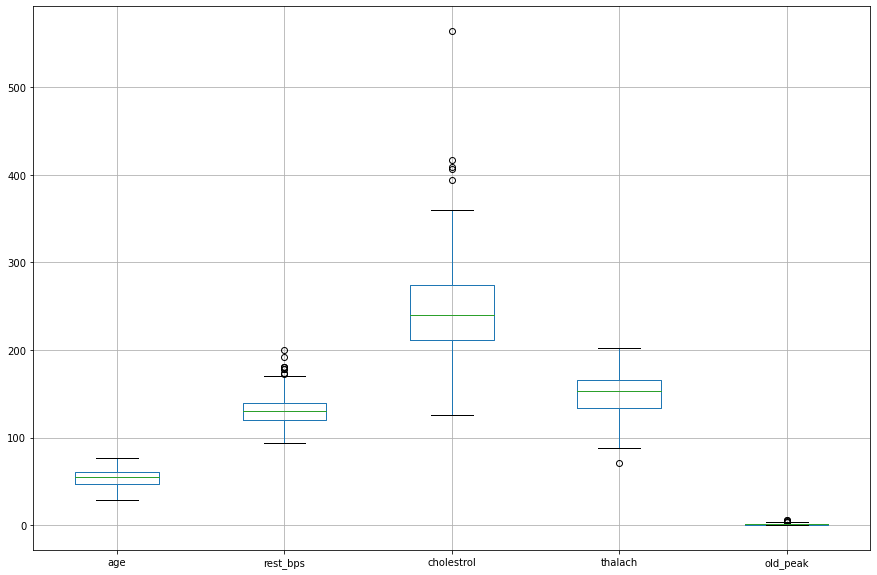

In [12]:
plt.rcParams['figure.figsize'] = [15,10]
independent_variable.boxplot()

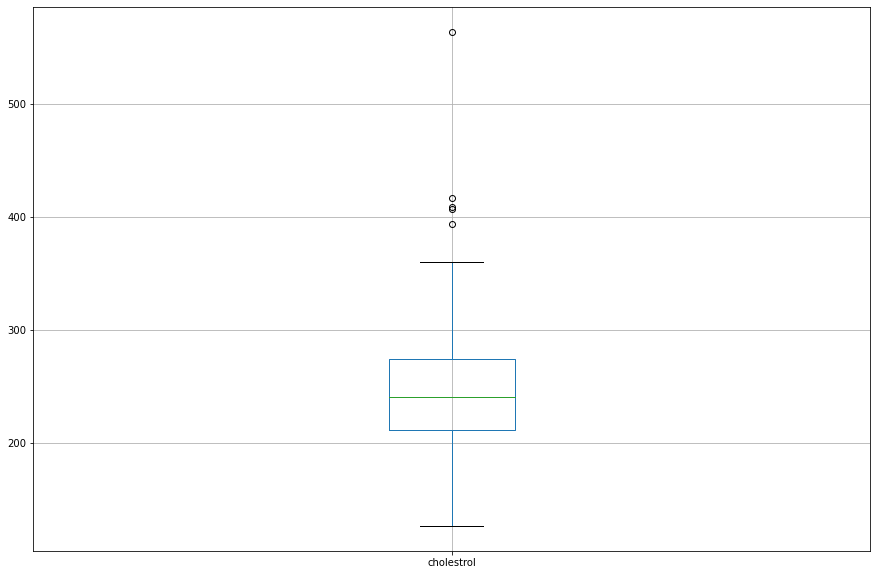

In [13]:
col = independent_variable[['cholestrol']]
col.boxplot()

In [14]:
Q1 = independent_variable.quantile(0.25)
Q3= independent_variable.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           13.5
rest_bps      20.0
cholestrol    63.5
thalach       32.5
old_peak       1.6
dtype: float64


In [15]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(lower)
print(' ')
print(upper)

age            27.25
rest_bps       90.00
cholestrol    115.75
thalach        84.75
old_peak       -2.40
dtype: float64
 
age            81.25
rest_bps      170.00
cholestrol    369.75
thalach       214.75
old_peak        4.00
dtype: float64


In [16]:
#data[((data<lower) | (data > upper))]
#data[~((data<lower) | (data > upper))]
#data[~((data<lower) | (data > upper)).any(axis=1)]

In [17]:
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
data = data.reset_index(drop = True)

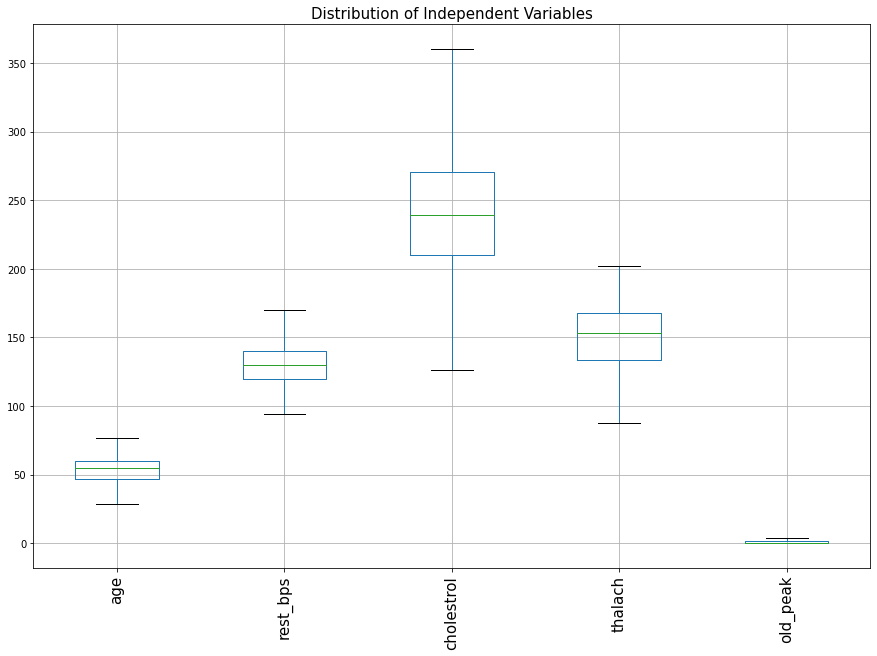

In [18]:
cols = ['age','rest_bps','cholestrol','thalach','old_peak']

# plot multiple boxplots
data[cols].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [19]:
data.shape

(284, 14)

In [20]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [21]:
str_data = data.select_dtypes(include = object)
num_data = data.select_dtypes(include = np.number)


In [22]:
str_data

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
279,0,0,0,1,1,1,0,3
280,1,3,0,1,0,1,0,3
281,1,0,1,1,0,1,2,3
282,1,0,0,1,1,1,1,3


In [23]:
num_data

,age,rest_bps,cholestrol,thalach,old_peak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
279,57,140,241,123,0.2,0
280,45,110,264,132,1.2,0
281,68,144,193,141,3.4,0
282,57,130,131,115,1.2,0


In [24]:
data_dummy = pd.get_dummies(str_data, drop_first= True)

In [25]:
dummy_data = pd.concat([num_data,data_dummy], axis = 1)
dummy_data.shape

(284, 23)

In [27]:
dummy_data

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,...,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
280,45,110,264,132,1.2,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
281,68,144,193,141,3.4,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
282,57,130,131,115,1.2,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [26]:
dummy_data.to_csv('ann_HeartDisease.csv')

In [25]:
x = dummy_data.drop(['target'], axis = 1)
y = pd.DataFrame(dummy_data['target'])

In [26]:
x.shape

(284, 22)

In [27]:
y.shape

(284, 1)

In [ ]:
speak('sir........creating ....functions')

# FUNCTIONS

In [28]:
def shape(x_train,x_test,y_train,y_test):
    print('x_train : ',x_train.shape)
    print('x_test : ',x_test.shape)
    print('y_train : ',y_train.shape)
    print('y_test : ',y_test.shape)

In [29]:
plt.rcParams['figure.figsize'] = [10,5]
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
def confuse_matrices(model):
    cm = confusion_matrix(y_test,y_predicted)
    conf_matri = pd.DataFrame(data = cm, columns=['predict 0 ', 'predict 1'], index = ['actual 0', 'actual 1'])
    sns.heatmap(conf_matri,annot=True,fmt = 'd',cmap = ListedColormap(['lightskyblue']) ,cbar = False, linewidths= 0.1, annot_kws= {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show

In [30]:
from sklearn.metrics import classification_report 
def score(model):
    return(classification_report(y_test,y_predicted))

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,cohen_kappa_score,roc_auc_score
def scores(model):
    print('accuracy_score :', accuracy_score(y_test,y_predicted))
    print('precision_score :', precision_score(y_test,y_predicted))
    print('recall_score :', recall_score(y_test,y_predicted))
    print('f1_score :', f1_score(y_test,y_predicted))
    print('cohen_kappa_score: ',cohen_kappa_score(y_test,y_predicted))
    print( 'roc_auc_score : ',roc_auc_score(y_test,y_predicted))

In [32]:
def result(model):
    result = pd.DataFrame({'models':[model_name],
                       'accuracy_score': [accuracy_score(y_test,y_predicted)],
                       'precision_score':[precision_score(y_test,y_predicted)],
                      'recall_score':[recall_score(y_test,y_predicted)],
                       'f1_score' : [f1_score(y_test,y_predicted)],
                      'cohen_kappa_score':[cohen_kappa_score(y_test,y_predicted)],
                      'roc_auc_score':[roc_auc_score(y_test,y_predicted)]})
    return result

In [33]:
from sklearn.metrics import roc_auc_score,roc_curve
def plt_roc(model):
    fpr,tpr,thresholds = roc_curve(y_test,y_predicted)
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    plt.title('roc_curve', fontsize = 15)
    plt.xlabel('false positive rate', fontsize = 15)
    plt.ylabel('true positive rate', fontsize = 15)
    roc_score = roc_auc_score(y_test,y_predicted)
    plt.text(x = 0.2,y = 0.9 , s = ('AUC score',round(roc_score,3)))
    plt.grid(True)

In [ ]:
speak('creating 1 st  model - Descion Tree')

# model - 1 .., DESCION TREE

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)

In [35]:
def shape(x_train,x_test,y_train,y_test):
    print('x_train : ',x_train.shape)
    print('x_test : ',x_test.shape)
    print('y_train : ',y_train.shape)
    print('y_test : ',y_test.shape)
    

In [36]:
shape(x_train,x_test,y_train,y_test)

x_train :  (198, 22)
x_test :  (86, 22)
y_train :  (198, 1)
y_test :  (86, 1)


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
descion_tree = DecisionTreeClassifier(criterion='entropy',random_state= 10)
descion_tree_model = descion_tree.fit(x_train,y_train)

In [40]:
y_predicted = descion_tree_model.predict(x_test)

# plot confuse matrices

In [41]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
def confuse_matrices(model):
    cm = confusion_matrix(y_test,y_predicted)
    conf_matri = pd.DataFrame(data = cm, columns=['predict 0 ', 'predict 1'], index = ['actual 0', 'actual 1'])
    sns.heatmap(conf_matri,annot=True,fmt = 'd',cmap = ListedColormap(['lightskyblue']) ,cbar = False, linewidths= 0.1, annot_kws= {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show

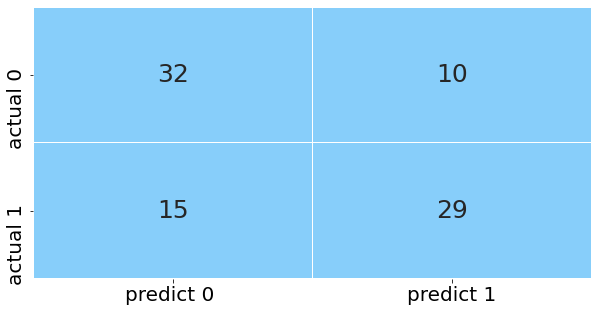

In [42]:
plt.rcParams['figure.figsize'] = [10,5]
confuse_matrices(descion_tree_model)

In [43]:
from sklearn.metrics import classification_report 
def score(model):
    return(classification_report(y_test,y_predicted))

In [44]:
print(score(descion_tree_model))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        42
           1       0.74      0.66      0.70        44

    accuracy                           0.71        86
   macro avg       0.71      0.71      0.71        86
weighted avg       0.71      0.71      0.71        86



In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,cohen_kappa_score,roc_auc_score
def scores(model):
    print('accuracy_score :', accuracy_score(y_test,y_predicted))
    print('precision_score :', precision_score(y_test,y_predicted))
    print('recall_score :', recall_score(y_test,y_predicted))
    print('f1_score :', f1_score(y_test,y_predicted))
    print('cohen_kappa_score: ',cohen_kappa_score(y_test,y_predicted))
    print( 'roc_auc_score : ',roc_auc_score(y_test,y_predicted))

In [46]:
scores(descion_tree_model)

accuracy_score : 0.7093023255813954
precision_score : 0.7435897435897436
recall_score : 0.6590909090909091
f1_score : 0.6987951807228915
cohen_kappa_score:  0.41985968699406373
roc_auc_score :  0.7104978354978355


In [47]:
model_name = 'descion_tree_model'

In [48]:
def result(model):
    result = pd.DataFrame({'models':[model_name],
                       'accuracy_score': [accuracy_score(y_test,y_predicted)],
                       'precision_score':[precision_score(y_test,y_predicted)],
                      'recall_score':[recall_score(y_test,y_predicted)],
                       'f1_score' : [f1_score(y_test,y_predicted)],
                      'cohen_kappa_score':[cohen_kappa_score(y_test,y_predicted)],
                      'roc_auc_score':[roc_auc_score(y_test,y_predicted)]})
    return result
    

In [49]:
model_1 = result(descion_tree_model)

In [50]:
results = pd.DataFrame(columns=  ['models','accuracy_score','precision_score','recall_score','f1_score','cohen_kappa_score','roc_auc_score'])

In [51]:
results = results.append(model_1)
results

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model,0.709302,0.74359,0.659091,0.698795,0.41986,0.710498


In [ ]:
speak('prune the descion tree')

# prune the descion tree

In [52]:
prune = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes=25, random_state= 10)
descion_tree_model_2 = prune.fit(x_train,y_train)

In [53]:
y_predicted = descion_tree_model_2.predict(x_test)
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

# lables = x_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(20,20))
graph = tree.plot_tree(descion_tree_model_2, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

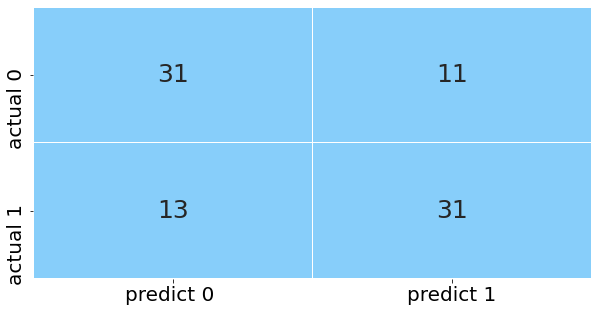

In [55]:
confuse_matrices(descion_tree_model_2)

In [56]:
scores(descion_tree_model_2)

accuracy_score : 0.7209302325581395
precision_score : 0.7380952380952381
recall_score : 0.7045454545454546
f1_score : 0.7209302325581395
cohen_kappa_score:  0.4421621621621622
roc_auc_score :  0.7213203463203464


In [57]:
model_name = 'descion_tree_model_2'

In [58]:
model_2 = result(descion_tree_model_2)

In [59]:
results = results.append(model_2)
results

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model,0.709302,0.743590,0.659091,0.698795,0.419860,0.710498
0,descion_tree_model_2,0.720930,0.738095,0.704545,0.720930,0.442162,0.721320


# descion tree (grid search)

# tuned_parameters = [{'criterion':['gini','entropy'], 
                     'min_samples_split':[10,20,30],
                    'max_depth':[3,5,7,9],
                    'min_samples_leaf':[15,20,25,30,35],
                    'max_leaf_nodes': [5,10,15,20,25]}]

descion_tree_classifier  = DecisionTreeClassifier(random_state= 10)

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = descion_tree_classifier,param_grid = tuned_parameters, cv = 10 )

dt_grid = grid.fit(x_train,y_train)

dt_grid.best_params_

grid_model = DecisionTreeClassifier(criterion =  'gini',max_depth =  3, max_leaf_nodes =  5,min_samples_leaf = 25,min_samples_split = 10)

# fig = plt.figure(figsize=(20,20))
figure = tree.plot_tree(descion_tree_model_3,
                        feature_names = x_train.columns,
                       class_names = ['0','1'],
                       filled = True)

In [71]:
y_predicted = descion_tree_model_3.predict(x_test)


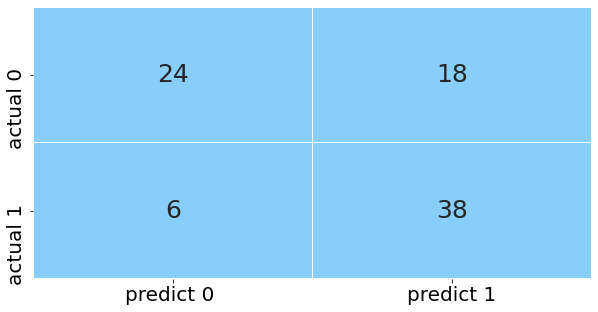

In [72]:
confuse_matrices(descion_tree_model_3)

In [73]:
scores(descion_tree_model_3)

accuracy_score : 0.7209302325581395
precision_score : 0.6785714285714286
recall_score : 0.8636363636363636
f1_score : 0.76
cohen_kappa_score:  0.43790849673202614
roc_auc_score :  0.7175324675324675


In [74]:
print(score(descion_tree_model_3))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        42
           1       0.68      0.86      0.76        44

    accuracy                           0.72        86
   macro avg       0.74      0.72      0.71        86
weighted avg       0.74      0.72      0.71        86



In [75]:
model_name = 'descion_tree_model_3'
model_3 = result(descion_tree_model_2)

In [76]:
model_3

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model_3,0.72093,0.678571,0.863636,0.76,0.437908,0.717532


In [77]:
results = results.append(model_3)
results

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model,0.709302,0.743590,0.659091,0.698795,0.419860,0.710498
0,descion_tree_model_2,0.720930,0.738095,0.704545,0.720930,0.442162,0.721320
0,descion_tree_model_3,0.720930,0.678571,0.863636,0.760000,0.437908,0.717532


In [ ]:
speak('creating model -............-LOGISTIC REGRESSION')

# LOGISTIC REGRESSION

In [78]:
from sklearn.linear_model import LogisticRegression
log_mdl = LogisticRegression()

In [79]:
log_train = log_mdl.fit(x_train,y_train)

In [80]:
y_predicted = log_train.predict(x_test)

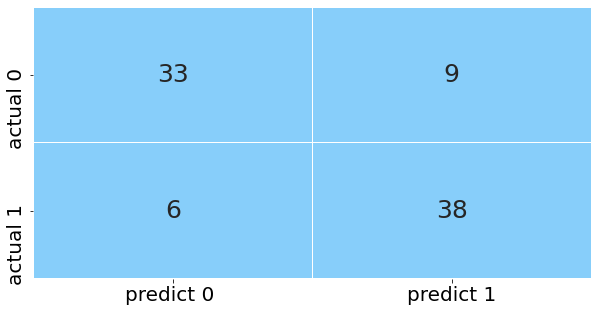

In [81]:
confuse_matrices(log_mdl)

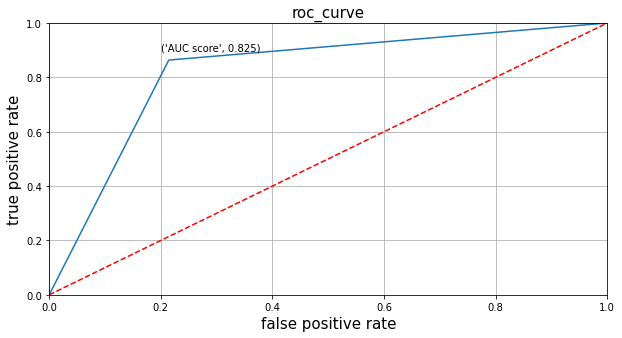

In [82]:
plt_roc(log_mdl)

In [83]:
scores(log_mdl)

accuracy_score : 0.8255813953488372
precision_score : 0.8085106382978723
recall_score : 0.8636363636363636
f1_score : 0.8351648351648351
cohen_kappa_score:  0.6504065040650406
roc_auc_score :  0.8246753246753247


In [84]:
print(score(log_mdl))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.81      0.86      0.84        44

    accuracy                           0.83        86
   macro avg       0.83      0.82      0.82        86
weighted avg       0.83      0.83      0.83        86



In [85]:
model_name = 'log_mdl'
model_4 = result(log_mdl)

In [86]:
results = results.append(model_4)

In [87]:
results

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model,0.709302,0.743590,0.659091,0.698795,0.419860,0.710498
0,descion_tree_model_2,0.720930,0.738095,0.704545,0.720930,0.442162,0.721320
0,descion_tree_model_3,0.720930,0.678571,0.863636,0.760000,0.437908,0.717532
0,log_mdl,0.825581,0.808511,0.863636,0.835165,0.650407,0.824675


In [ ]:
speak('creating model .............. logistic regression with SGD')

# LOGISTIC REGRESSION WITH SGD

In [88]:
from sklearn.linear_model import SGDClassifier
SGD_mdl= SGDClassifier(loss = 'log', random_state = 10)
log_reg_SGD = SGD_mdl.fit(x_train,y_train)

In [89]:
y_predicted = log_reg_SGD.predict(x_test)

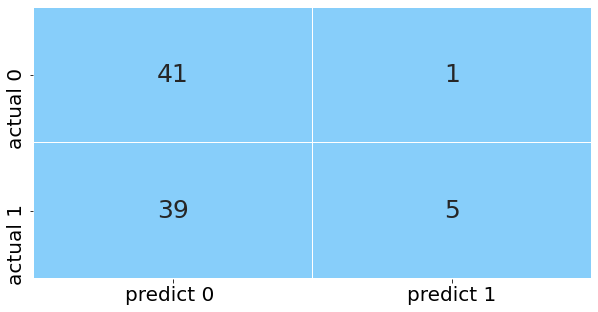

In [90]:
confuse_matrices(log_reg_SGD)

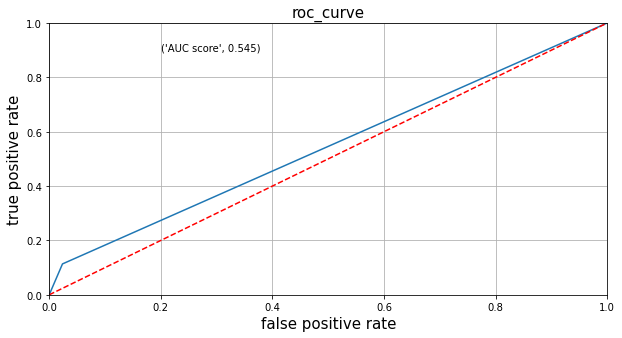

In [91]:
plt_roc(log_reg_SGD)

In [92]:
scores(log_reg_SGD)

accuracy_score : 0.5348837209302325
precision_score : 0.8333333333333334
recall_score : 0.11363636363636363
f1_score : 0.19999999999999998
cohen_kappa_score:  0.08801696712619311
roc_auc_score :  0.5449134199134198


In [93]:
print(score(log_reg_SGD))

              precision    recall  f1-score   support

           0       0.51      0.98      0.67        42
           1       0.83      0.11      0.20        44

    accuracy                           0.53        86
   macro avg       0.67      0.54      0.44        86
weighted avg       0.68      0.53      0.43        86



In [94]:
model_name = 'log_reg_SGD'
model_5 = result(log_reg_SGD)

In [95]:
results = results.append(model_5)

In [96]:
results

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model,0.709302,0.743590,0.659091,0.698795,0.419860,0.710498
0,descion_tree_model_2,0.720930,0.738095,0.704545,0.720930,0.442162,0.721320
0,descion_tree_model_3,0.720930,0.678571,0.863636,0.760000,0.437908,0.717532
0,log_mdl,0.825581,0.808511,0.863636,0.835165,0.650407,0.824675
0,log_reg_SGD,0.534884,0.833333,0.113636,0.200000,0.088017,0.544913


In [ ]:
speak(' creating ................bagging model ')

# BAGGING

In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [98]:
bagging_classifier = BaggingClassifier(tree.DecisionTreeClassifier(random_state= 10))

In [99]:
bagging_model = bagging_classifier.fit(x_train,y_train)

In [100]:
y_predicted = bagging_model.predict(x_test)

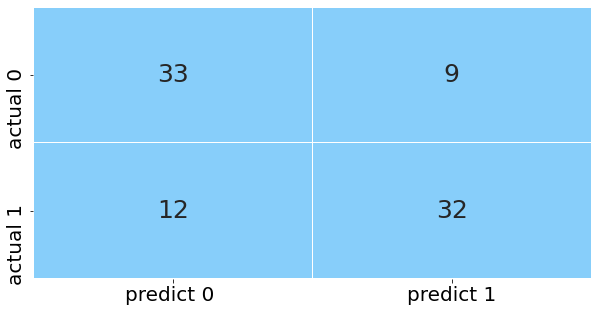

In [101]:
confuse_matrices(bagging_model)

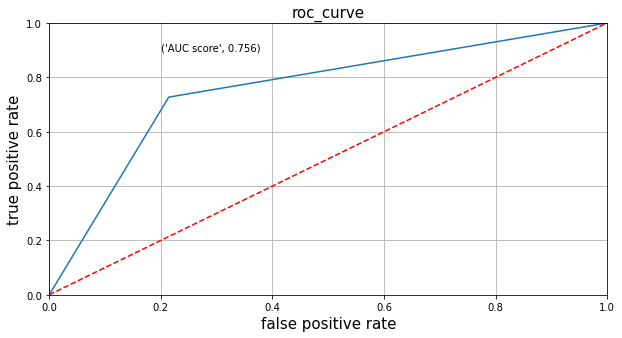

In [102]:
plt_roc(bagging_model)

In [103]:
print(score(bagging_model))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        42
           1       0.78      0.73      0.75        44

    accuracy                           0.76        86
   macro avg       0.76      0.76      0.76        86
weighted avg       0.76      0.76      0.76        86



In [104]:
scores(bagging_model)

accuracy_score : 0.7558139534883721
precision_score : 0.7804878048780488
recall_score : 0.7272727272727273
f1_score : 0.7529411764705882
cohen_kappa_score:  0.5121555915721232
roc_auc_score :  0.7564935064935066


In [105]:
model_name = 'bagging_model'
model_6 = result(bagging_model)

In [106]:
results = results.append(model_6)

In [107]:
results

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model,0.709302,0.743590,0.659091,0.698795,0.419860,0.710498
0,descion_tree_model_2,0.720930,0.738095,0.704545,0.720930,0.442162,0.721320
0,descion_tree_model_3,0.720930,0.678571,0.863636,0.760000,0.437908,0.717532
0,log_mdl,0.825581,0.808511,0.863636,0.835165,0.650407,0.824675
0,log_reg_SGD,0.534884,0.833333,0.113636,0.200000,0.088017,0.544913
0,bagging_model,0.755814,0.780488,0.727273,0.752941,0.512156,0.756494


In [ ]:
speak('creating ....... adaboost model')

# ADABOOST

In [108]:
from sklearn.ensemble import AdaBoostClassifier

In [109]:
ADABOOST = AdaBoostClassifier(random_state= 10)

In [110]:
ADABOOST_mdl = ADABOOST.fit(x_train,y_train)

In [111]:
y_predicted = ADABOOST_mdl.predict(x_test)

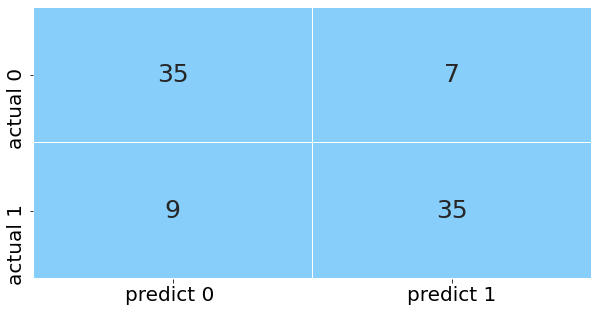

In [112]:
confuse_matrices(ADABOOST)

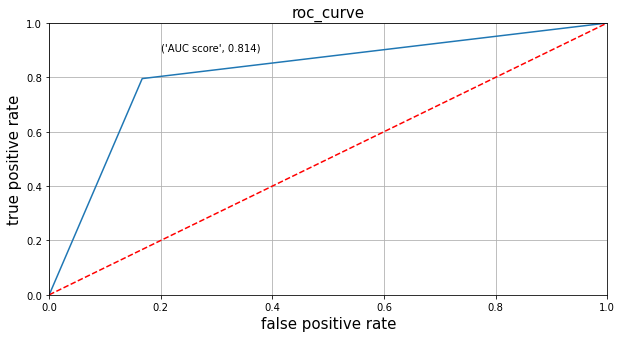

In [113]:
plt_roc(ADABOOST)

In [114]:
scores(ADABOOST)

accuracy_score : 0.813953488372093
precision_score : 0.8333333333333334
recall_score : 0.7954545454545454
f1_score : 0.8139534883720929
cohen_kappa_score:  0.6281081081081081
roc_auc_score :  0.8143939393939394


In [115]:
model_name = 'ADABOOST'
model_7 = result(ADABOOST)

In [116]:
results = results.append(model_7)

In [117]:
results

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model,0.709302,0.743590,0.659091,0.698795,0.419860,0.710498
0,descion_tree_model_2,0.720930,0.738095,0.704545,0.720930,0.442162,0.721320
0,descion_tree_model_3,0.720930,0.678571,0.863636,0.760000,0.437908,0.717532
0,log_mdl,0.825581,0.808511,0.863636,0.835165,0.650407,0.824675
0,log_reg_SGD,0.534884,0.833333,0.113636,0.200000,0.088017,0.544913
0,bagging_model,0.755814,0.780488,0.727273,0.752941,0.512156,0.756494
0,ADABOOST,0.813953,0.833333,0.795455,0.813953,0.628108,0.814394


In [ ]:
speak( ' creating model xg boost')

# XGBOOST

In [118]:
from xgboost import XGBClassifier

In [119]:
xgbm = XGBClassifier(random_state = 10,learning_rate = 0.01)

In [120]:
xgbm_mdl = xgbm.fit(x_train,y_train)

[18:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [121]:
y_predicted = xgbm_mdl.predict(x_test)

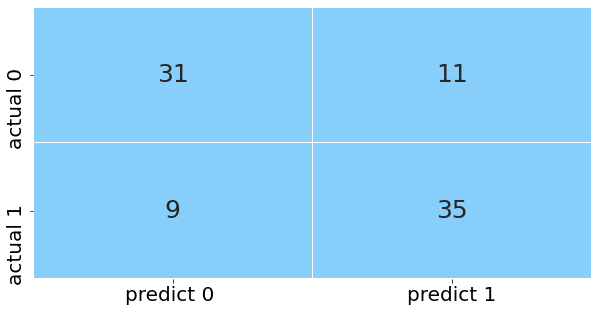

In [122]:
confuse_matrices(xgbm_mdl)

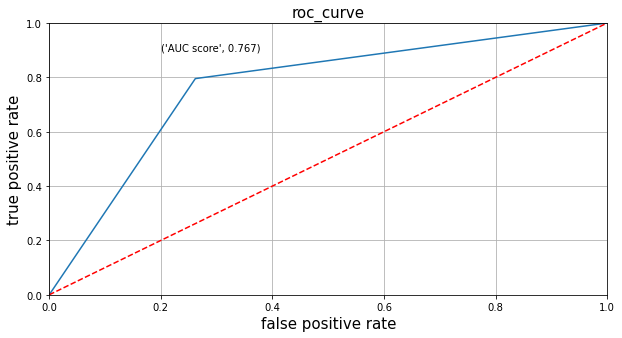

In [123]:
plt_roc(xgbm_mdl)

In [124]:
scores(xgbm_mdl)

accuracy_score : 0.7674418604651163
precision_score : 0.7608695652173914
recall_score : 0.7954545454545454
f1_score : 0.7777777777777778
cohen_kappa_score:  0.534127843986999
roc_auc_score :  0.7667748917748918


In [125]:
model_name = 'xgbm_mdl'
model_8 = result(xgbm_mdl)

In [126]:
results = results.append(model_8)

In [127]:
results

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model,0.709302,0.743590,0.659091,0.698795,0.419860,0.710498
0,descion_tree_model_2,0.720930,0.738095,0.704545,0.720930,0.442162,0.721320
0,descion_tree_model_3,0.720930,0.678571,0.863636,0.760000,0.437908,0.717532
0,log_mdl,0.825581,0.808511,0.863636,0.835165,0.650407,0.824675
0,log_reg_SGD,0.534884,0.833333,0.113636,0.200000,0.088017,0.544913
0,bagging_model,0.755814,0.780488,0.727273,0.752941,0.512156,0.756494
0,ADABOOST,0.813953,0.833333,0.795455,0.813953,0.628108,0.814394
0,xgbm_mdl,0.767442,0.760870,0.795455,0.777778,0.534128,0.766775


# K-NN

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
tuned_parameter = [{'n_neighbors': [3,5], 'metric': ['manhattan','euclidean']}]

In [131]:
grid = GridSearchCV(estimator = KNeighborsClassifier() ,param_grid = tuned_parameter,cv = 5, scoring='accuracy')

In [132]:
grid_mdl = grid.fit(x_train,y_train)

In [136]:
grid_mdl.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [137]:
knn_mdl = KNeighborsClassifier(n_neighbors =  3,metric = 'manhattan')

In [138]:
knn_mdl = knn_mdl.fit(x_train,y_train)

In [139]:
y_predicted = knn_mdl.predict(x_test)

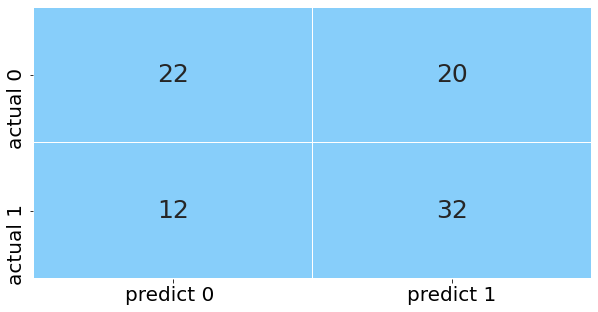

In [140]:
confuse_matrices(knn_mdl)

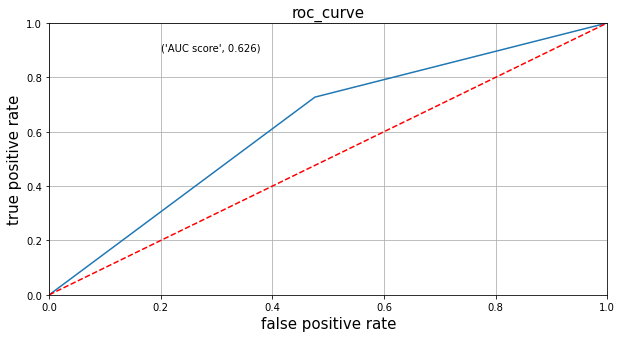

In [141]:
plt_roc(knn_mdl)

In [142]:
scores(knn_mdl)

accuracy_score : 0.627906976744186
precision_score : 0.6153846153846154
recall_score : 0.7272727272727273
f1_score : 0.6666666666666667
cohen_kappa_score:  0.25217391304347825
roc_auc_score :  0.6255411255411255


In [143]:
model_name = 'knn_mdl
model_9 = result(knn_mdl)

In [144]:
results = results.append(model_9)

In [145]:
results

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,descion_tree_model,0.709302,0.743590,0.659091,0.698795,0.419860,0.710498
0,descion_tree_model_2,0.720930,0.738095,0.704545,0.720930,0.442162,0.721320
0,descion_tree_model_3,0.720930,0.678571,0.863636,0.760000,0.437908,0.717532
0,log_mdl,0.825581,0.808511,0.863636,0.835165,0.650407,0.824675
0,log_reg_SGD,0.534884,0.833333,0.113636,0.200000,0.088017,0.544913
0,bagging_model,0.755814,0.780488,0.727273,0.752941,0.512156,0.756494
0,ADABOOST,0.813953,0.833333,0.795455,0.813953,0.628108,0.814394
0,xgbm_mdl,0.767442,0.760870,0.795455,0.777778,0.534128,0.766775
0,knn_mdl,0.627907,0.615385,0.727273,0.666667,0.252174,0.625541


In [29]:
!pip install cowsay

In [30]:
import cowsay

In [35]:
cowsay.turkey('hello')

  _____
< hello >
  =====
          \
           \
            \
             \
                                               ,+*^^*+___+++_
                                         ,*^^^^              )
                                      _+*                     ^**+_
                                    +^       _ _++*+_+++_,         )
                _+^^*+_    (     ,+*^ ^          \\+_        )
               {       )  (    ,(    ,_+--+--,      ^)      ^\\
              { (\@)    } f   ,(  ,+-^ __*_*_  ^^\\_   ^\\       )
             {:;-/    (_+*-+^^^^^+*+*<_ _++_)_    )    )      /
            ( /  (    (        ,___    ^*+_+* )   <    <      \\
             U _/     )    *--<  ) ^\\-----++__)   )    )       )
              (      )  _(^)^^))  )  )\\^^^^^))^*+/    /       /
            (      /  (_))_^)) )  )  ))^^^^^))^^^)__/     +^^
           (     ,/    (^))^))  )  ) ))^^^^^^^))^^)       _)
            *+__+*       (_))^)  ) ) ))^^^^^^))^^^^^)____*^
            \\       